pre-processing and DGE analysis of capsaspora owzarzaki single-cell multiomics (RNA seq and ATAC seq)
(runnign on python3.9.1)

In [1]:
import muon as mu
import scanpy as sc
import numpy as np
import pandas as pd

/Users/work/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#filtered matrix gex
gex_filtered = "/Users/work/Library/Mobile Documents/com~apple~CloudDocs/Desktop/ADesktop/Studium/PhD/unicellulars/capsaspora_gex/filtered_feature_bc_matrix.h5"
adata = sc.read_10x_h5(gex_filtered)
sc.settings.verbosity = 3


In [3]:
sc.pp.filter_cells(adata, min_genes=250)
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata,max_genes=3000)

filtered out 2895 cells that have less than 250 genes expressed
filtered out 1460 genes that are detected in less than 10 cells


normalizing counts per cell
    finished (0:00:00)


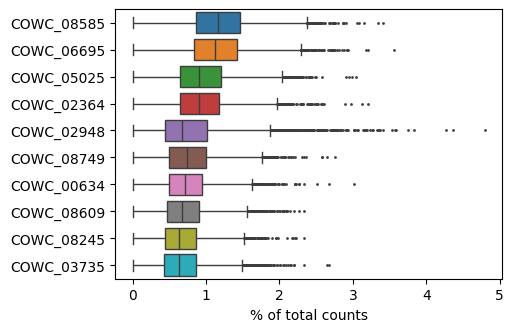

In [4]:
sc.pl.highest_expr_genes(adata, n_top=10)


In [5]:
sc.pp.calculate_qc_metrics(
    adata, percent_top=None, log1p=False, inplace=True)

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


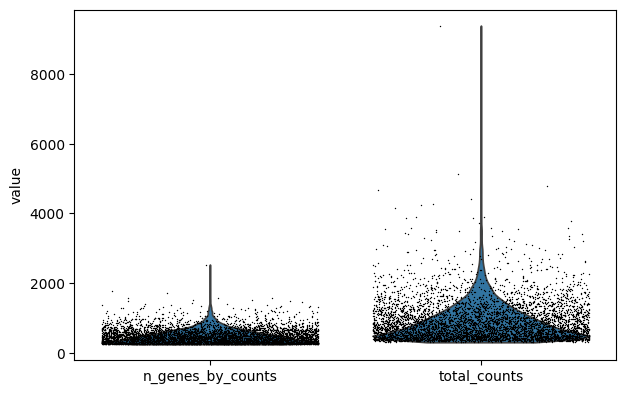

In [7]:
sc.pl.violin(adata,["n_genes_by_counts", "total_counts"],jitter=0.4,multi_panel=False,)

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)


normalizing counts per cell
    finished (0:00:00)


In [9]:
sc.pp.log1p(adata)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


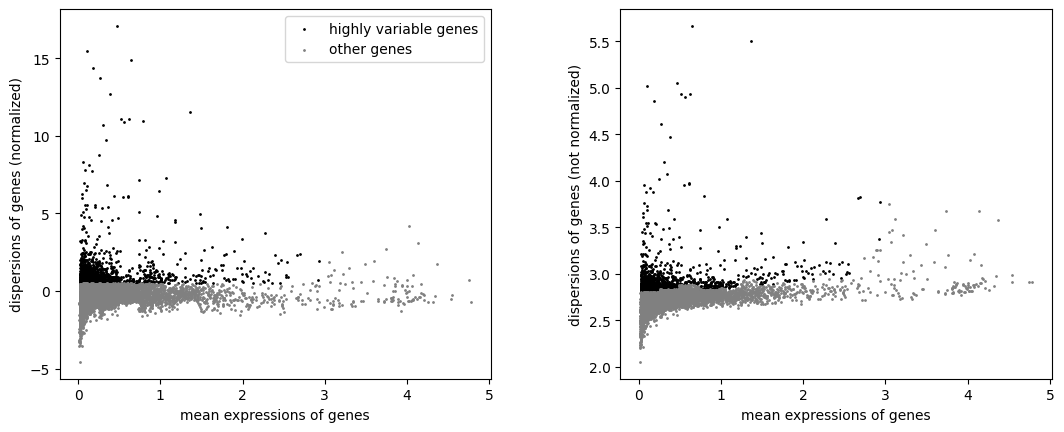

In [10]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [10]:
adata.raw = adata #in case we need it later
sc.pp.regress_out(adata, ["total_counts"]) #remove unwanted variance
sc.pp.scale(adata, max_value=10) #scale data to unit variance and zero mean, the max_values gets rid of outliers
sc.tl.pca(adata, svd_solver="arpack") #principal component analysis

regressing out ['total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:41)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


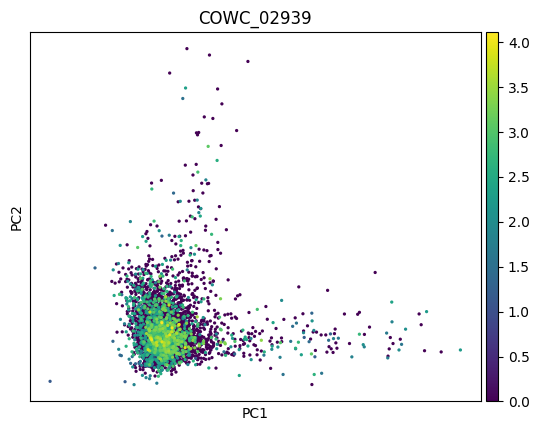

In [11]:
sc.pl.pca(adata, color="COWC_02939")

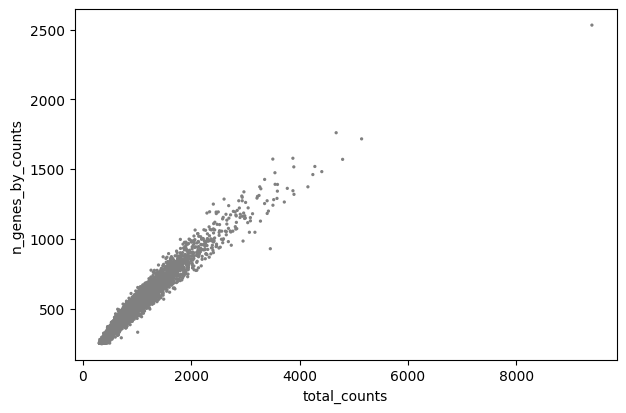

In [12]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

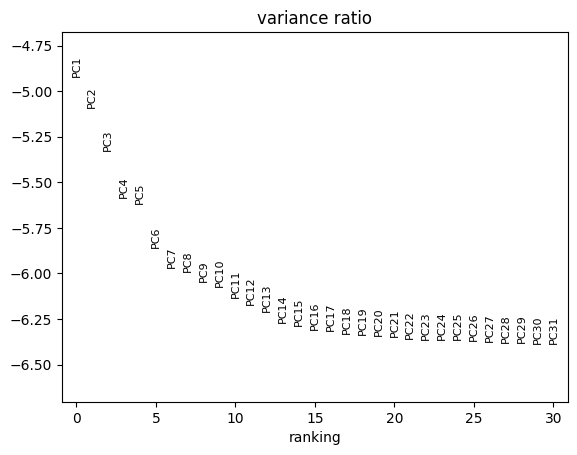

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
#to check the cumulative sum of variance explained by the PCs
np.cumsum(adata.uns['pca']['variance_ratio'])

array([0.00728625, 0.01345437, 0.01831179, 0.02206685, 0.02570658,
       0.02855938, 0.03112024, 0.03362518, 0.0359904 , 0.03829033,
       0.04046315, 0.04255512, 0.04456607, 0.04645512, 0.04831734,
       0.05013881, 0.05194572, 0.05372771, 0.05549999, 0.05725894,
       0.05901159, 0.06074696, 0.06247253, 0.0641952 , 0.06591373,
       0.06762245, 0.06932153, 0.07101807, 0.07271142, 0.07439978,
       0.07608701, 0.07776279, 0.07943449, 0.08109169, 0.08274872,
       0.08440443, 0.08605776, 0.08770887, 0.08935666, 0.09099755,
       0.09263675, 0.09427158, 0.09589719, 0.0975208 , 0.09913886,
       0.10075004, 0.10235889, 0.10396282, 0.10556471, 0.10716372],
      dtype=float32)

computing the neighoburhood graph

In [15]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


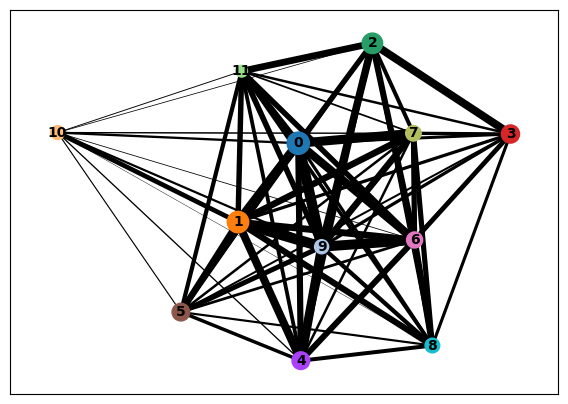

In [115]:
sc.tl.paga(adata)
sc.pl.paga(adata)

embedding the neighbourhood graph

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


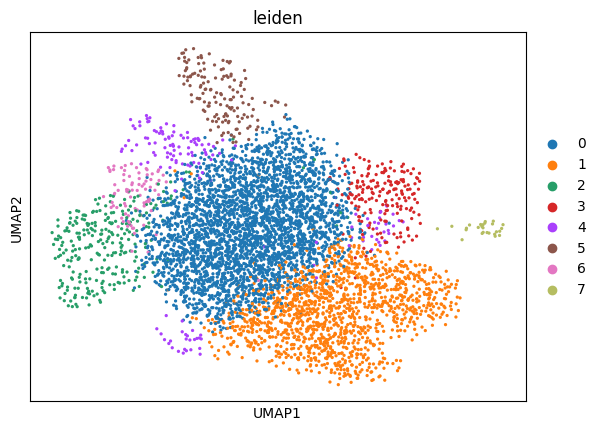

In [134]:
sc.tl.umap(adata,min_dist=1.5,spread=1.5,init_pos="spectral")
sc.tl.leiden(adata,resolution=0.5)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


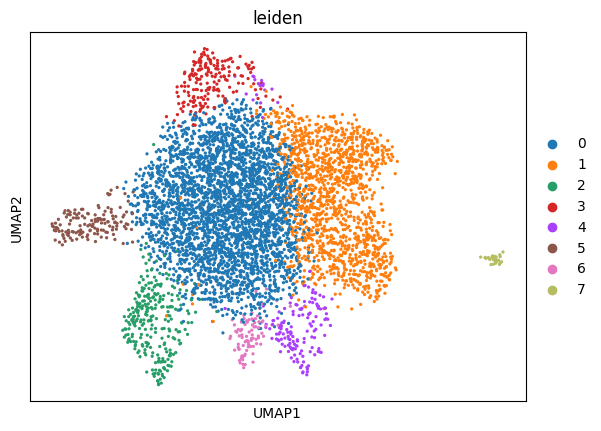

In [148]:
sc.tl.umap(adata,random_state=1)
sc.pl.umap(adata, legend_loc="right margin",color="leiden")

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


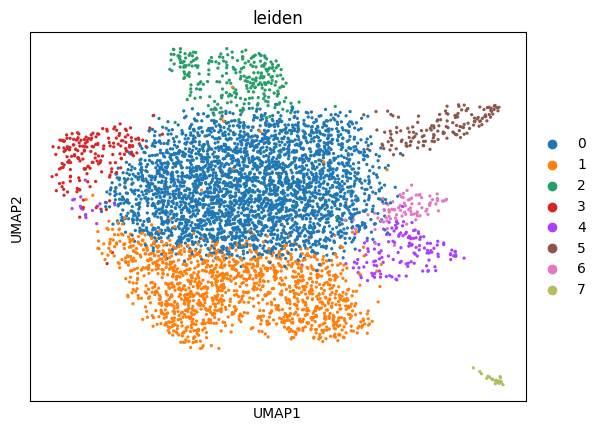

In [149]:
sc.tl.umap(adata,random_state=2)
sc.pl.umap(adata, legend_loc="right margin",color="leiden")

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


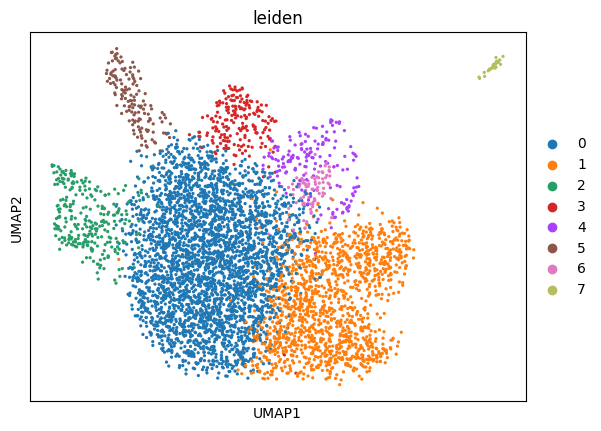

In [150]:
sc.tl.umap(adata,random_state=3)
sc.pl.umap(adata, legend_loc="right margin",color="leiden")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


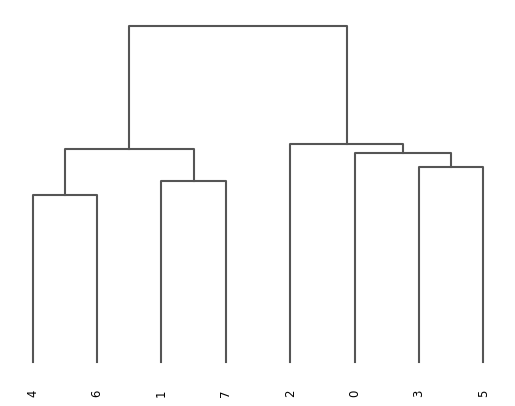

<Axes: >

In [151]:
sc.tl.dendrogram(adata,groupby="leiden")
sc.pl.dendrogram(adata,groupby="leiden")

In [152]:
sc.tl.rank_genes_groups(adata,groupby="leiden")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


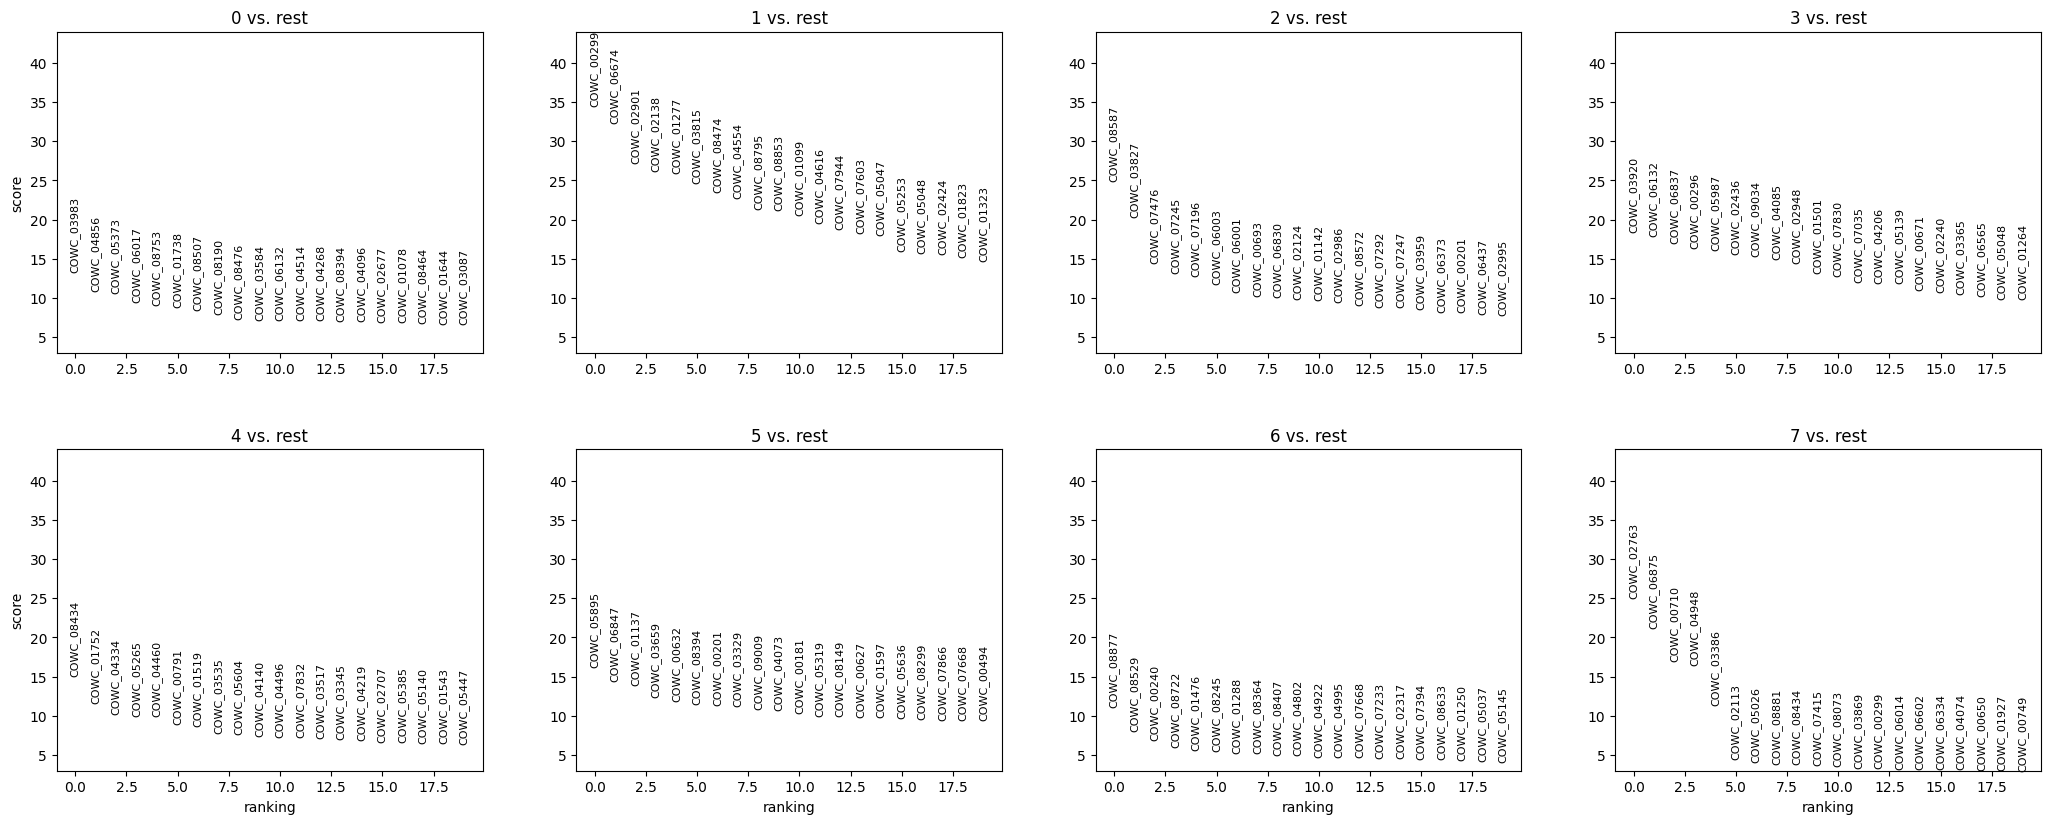

In [153]:
sc.pl.rank_genes_groups(adata)

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


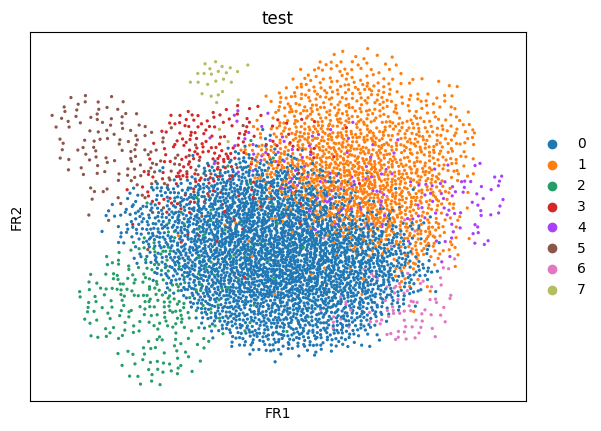

In [93]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata,color="leiden")

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


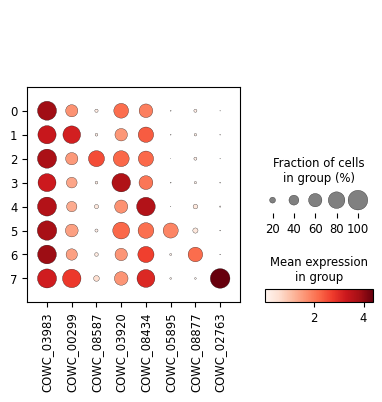

In [140]:
marker_genes = ["COWC_03983","COWC_00299","COWC_08587","COWC_03920","COWC_08434","COWC_05895","COWC_08877","COWC_02763"]
sc.pl.dotplot(adata,var_names=marker_genes,groupby="leiden")

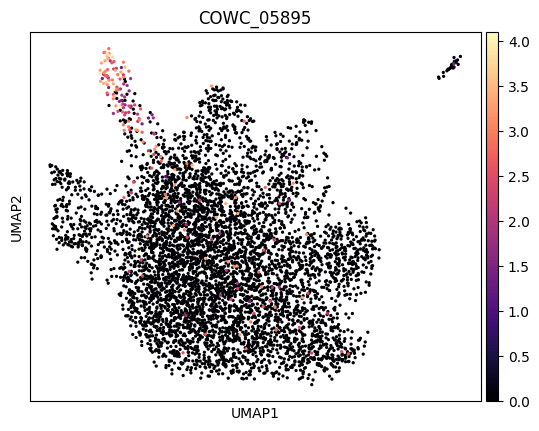

In [158]:
sc.pl.umap(adata,color="COWC_05895",cmap="magma")

In [109]:
adata.uns["rank_genes_groups"]["names"]

rec.array([('COWC_03983', 'COWC_00299', 'COWC_08587', 'COWC_03920', 'COWC_08434', 'COWC_05895', 'COWC_08877', 'COWC_02763'),
           ('COWC_04856', 'COWC_06674', 'COWC_03827', 'COWC_06132', 'COWC_01752', 'COWC_06847', 'COWC_08529', 'COWC_06875'),
           ('COWC_05373', 'COWC_02901', 'COWC_07476', 'COWC_06837', 'COWC_04334', 'COWC_01137', 'COWC_00240', 'COWC_00710'),
           ...,
           ('COWC_08474', 'COWC_08507', 'COWC_08026', 'COWC_05144', 'COWC_01271', 'COWC_05600', 'COWC_01997', 'COWC_04929'),
           ('COWC_03815', 'COWC_08085', 'COWC_07679', 'COWC_06680', 'COWC_03308', 'COWC_04070', 'COWC_08083', 'COWC_02656'),
           ('COWC_02138', 'COWC_06132', 'COWC_04569', 'COWC_06003', 'COWC_03112', 'COWC_03888', 'COWC_04661', 'COWC_05587')],
          dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O')])

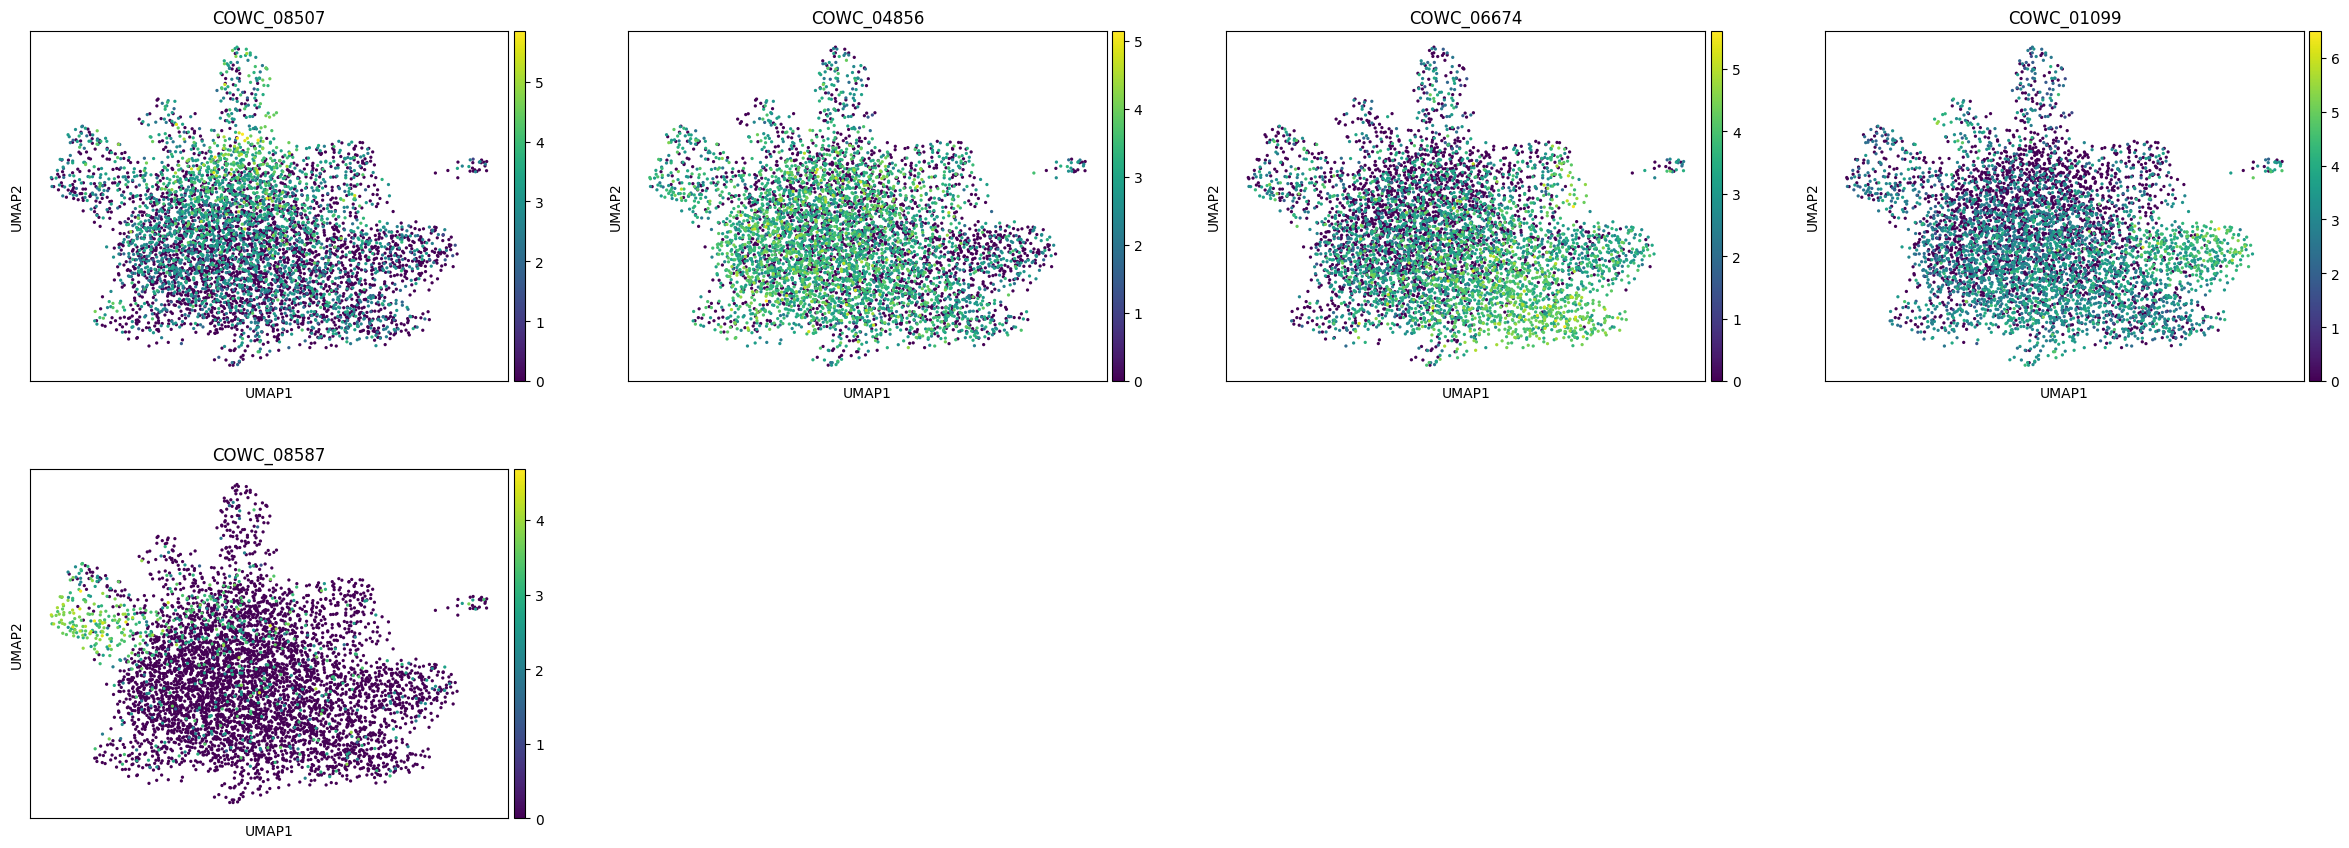

In [80]:
sc.pl.umap(adata,color=marker_genes)